In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
     


In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)
num_obs = 150
unique_profs = 100

data = {
    'prof_id': np.random.randint(1, unique_profs + 1, num_obs),
    'age': np.random.randint(25, 71, num_obs),  # changed to 25-70
    'gender': np.random.choice(['Male', 'Female'], num_obs, p=[0.5, 0.5]),  # 50-50 split
    'tenure': np.random.choice(['Yes', 'No'], num_obs, p=[0.7, 0.3]),  # 70% Yes
    'division': np.random.choice(['Lower', 'Upper'], num_obs, p=[0.4, 0.6]),  # 60% Upper
    'eval_score': np.round(np.random.normal(loc=3.5, scale=0.7, size=num_obs), 2)  # mean=3.5, sd=0.7
}

df = pd.DataFrame(data)
df.head()


,prof_id,age,gender,tenure,division,eval_score
0,52,63,Female,Yes,Upper,4.48
1,93,51,Male,No,Upper,2.58
2,15,33,Male,Yes,Upper,2.16
3,72,39,Female,Yes,Upper,4.16
4,61,39,Female,Yes,Upper,3.52


Q1. Identify all duplicate cases using prof. Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the dat
a set to include one observation for each instructor with a total number of observations restricted to 94.

In [3]:
'''
Question 1: Identify all duplicate cases using prof. Using all observations,
find the average and standard deviation for age. Repeat the analysis by first filtering the
 data set to include one observation for each instructor with a total number of observations restricted to 94.
 '''

# identify duplicate cases
duplicates = df[df.duplicated(subset=['prof_id'], keep=False)]
print(f"Found {duplicates.shape[0]} records that are duplicates based on prof_id.")
print("---" * 10)

# stats for all observations
avg_age_full = df['age'].mean()
std_age_full = df['age'].std()
print("Using all observations:")
print(f"Average Age: {avg_age_full:.2f}")
print(f"Standard Deviation of Age: {std_age_full:.2f}")
print("---" * 10)


# stats for filtered data
df_unique_profs = df.drop_duplicates(subset=['prof_id'], keep='first')

# restrict to 94 observations (as per the question)
df_filtered = df_unique_profs.head(94)

avg_age_filtered = df_filtered['age'].mean()
std_age_filtered = df_filtered['age'].std()

print(f"Using {df_filtered.shape[0]} unique instructor observations:")
print(f"Average Age: {avg_age_filtered:.2f}")
print(f"Standard Deviation of Age: {std_age_filtered:.2f}")


Found 120 records that are duplicates based on prof_id.
------------------------------
Using all observations:
Average Age: 47.48
Standard Deviation of Age: 13.27
------------------------------
Using 75 unique instructor observations:
Average Age: 46.51
Standard Deviation of Age: 13.37


Q2. Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

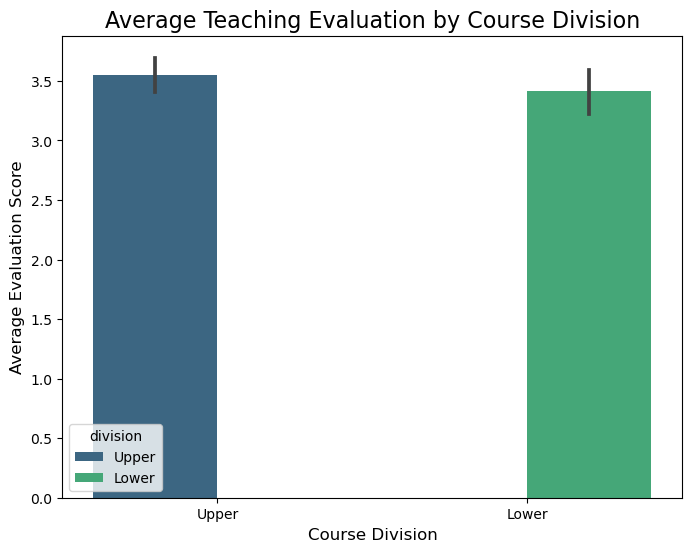

In [4]:
# Question 2: Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='division', y='eval_score', palette='viridis', hue='division')

plt.title('Average Teaching Evaluation by Course Division', fontsize=16)
plt.xlabel('Course Division', fontsize=12)
plt.ylabel('Average Evaluation Score', fontsize=12)
plt.show()
     

Q3. Plot the relationship between age and teaching evaluation scores.

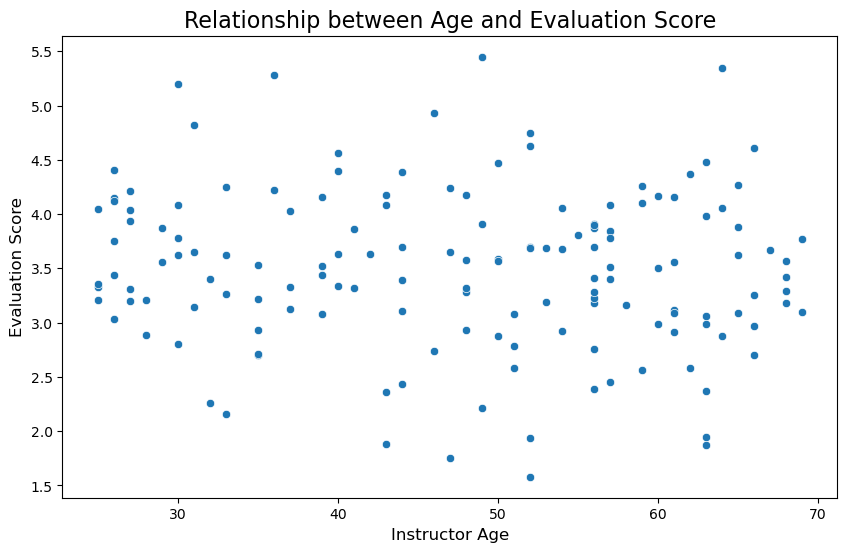

In [5]:
# Question 3: Plot the relationship between age and teaching evaluation scores.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='eval_score')

plt.title('Relationship between Age and Evaluation Score', fontsize=16)
plt.xlabel('Instructor Age', fontsize=12)
plt.ylabel('Evaluation Score', fontsize=12)
plt.show()

Q4. Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

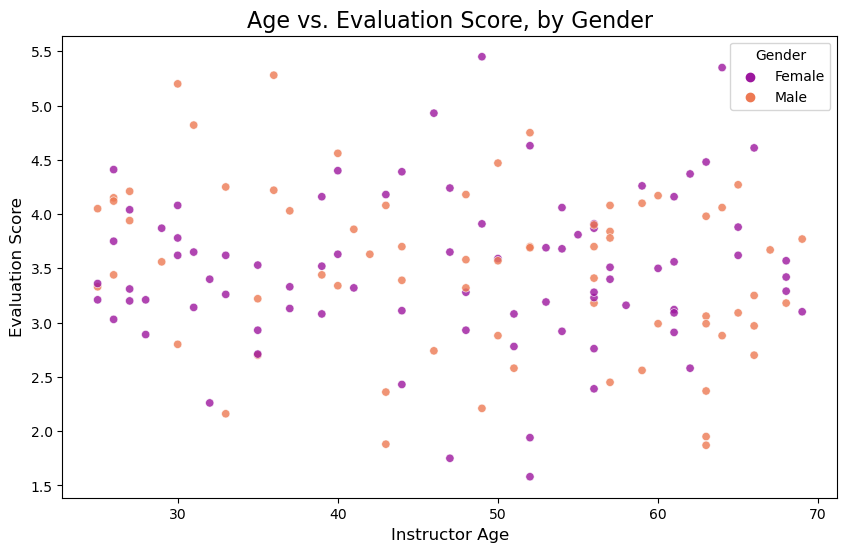

In [6]:
# Question 4: Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='eval_score', hue='gender', palette='plasma', alpha=0.8)

plt.title('Age vs. Evaluation Score, by Gender', fontsize=16)
plt.xlabel('Instructor Age', fontsize=12)
plt.ylabel('Evaluation Score', fontsize=12)
plt.legend(title='Gender')
plt.show()

Q5. Create a scatterplot of age and evaluation scores, differentiated by gender and tenure.

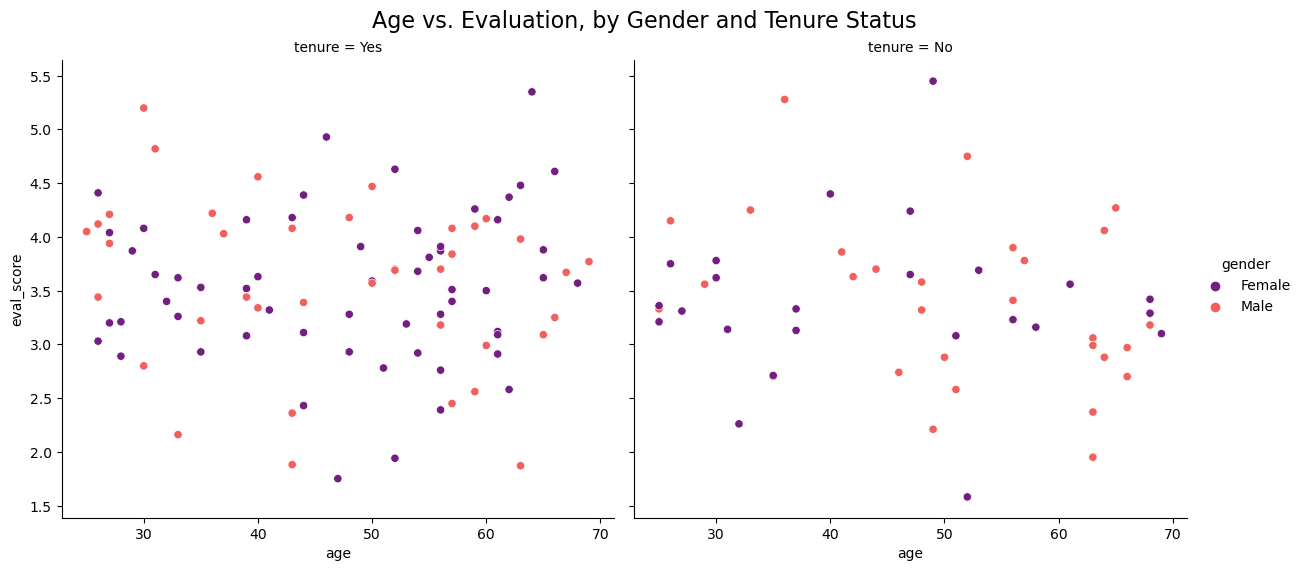

In [7]:
# Question 5: Create a scatterplot of age and evaluation scores, differentiated by gender and tenure.

g = sns.relplot(
    data=df,
    x='age',
    y='eval_score',
    hue='gender',
    col='tenure',
    kind='scatter',
    palette='magma',
    height=5.5,
    aspect=1.1
)

g.fig.suptitle('Age vs. Evaluation, by Gender and Tenure Status', y=1.03, fontsize=16)
plt.show()